# How Does the Film Industry Actually Make Money? 

http://www.nytimes.com/2012/07/01/magazine/how-does-the-film-industry-actually-make-money.html?_r=0

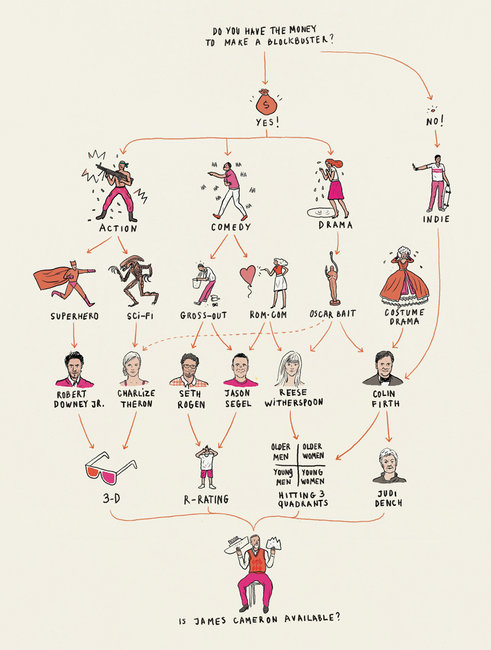

In [41]:
import numpy as np
from IPython.display import Image
Image(filename='./Downloads/01economy2-popup.jpg') 

 Because it’s harder to get financing and audiences, companies are competing to make bigger, costlier films while eliminating risk, which is why ever-more movies are based on existing intellectual property. Eighteen of the all-time 100 top-grossing movies (adjusted for inflation) were sequels, and more than half of those were released since 2000.

Predictability might win the weekend, Perretti says, but it could eventually make people weary. Meanwhile, Lieberman, from PricewaterhouseCoopers, sees significant growth in another entertainment business that’s constantly experimenting with different models, distribution methods and ways of telling stories. Maybe TV is finally going to kill movies after all.

1- Stratégie de continuation: What worked previously ?
    - identifier les films profitables (ratio dépenses/recettes) par le passé
2- Stragégie alternative: What works online ?
    - indifier les films qui marchent à la location en ligne (Amazon, Google, NetFlix, etc ...)

In [7]:
import tmdbsimple as tmdb

tmdb.API_KEY = '81409edbd40ff12e12e116b02969311b'

In [15]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'http://www.the-numbers.com/movie/budgets/all'
r = requests.get(url)
print (r)
soup = BeautifulSoup(r.text)
#print (soup)
table = soup.findAll('table')[0]

#print (table) 
columns = list(map(lambda x: x.text, table.select('th')))
df = pd.DataFrame(columns=columns)
for tr in table.select('tr'):
	liste = list(map(lambda x: x.text, tr.select('td'))) 
	if len(liste)>0:
		df.loc[len(df)] = liste
df

<Response [200]>


,,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,12/18/2009,Avatar,"$425,000,000","$760,507,625","$2,783,918,982"
1,2,5/24/2007,Pirates of the Caribbean: At World's End,"$300,000,000","$309,420,425","$963,420,425"
2,3,11/6/2015,Spectre,"$300,000,000","$185,745,058","$793,245,058"
3,4,7/20/2012,The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099"
4,5,7/2/2013,The Lone Ranger,"$275,000,000","$89,289,910","$259,989,910"
5,6,3/9/2012,John Carter,"$275,000,000","$73,058,679","$282,778,100"
6,7,11/24/2010,Tangled,"$260,000,000","$200,821,936","$586,581,936"
7,8,5/4/2007,Spider-Man 3,"$258,000,000","$336,530,303","$890,875,303"
8,9,5/1/2015,The Avengers: Age of Ultron,"$250,000,000","$459,005,868","$1,404,705,868"
9,10,12/14/2012,The Hobbit: An Unexpected Journey,"$250,000,000","$303,003,568","$1,017,003,568"


In [16]:
df = df.drop(df.columns[0], 1)

In [17]:
df['Production Budget'] = df['Production Budget'].str.replace('$','').str.replace(',','')
df['Domestic Gross'] = df['Domestic Gross'].str.replace('$','').str.replace(',','')
df['Worldwide Gross'] = df['Worldwide Gross'].str.replace('$','').str.replace(',','')

In [18]:
df['Domestic Profitability'] = df['Domestic Gross'].astype(float)/df['Production Budget'].astype(float)
df['Worldwilde Profitability'] = df['Worldwide Gross'].astype(float)/df['Production Budget'].astype(float)

In [19]:
from datetime import datetime
from dateutil.parser import parse
df['Release Date'] = list(map(lambda x : parse(x), df['Release Date']))

In [20]:
df

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014


In [57]:
def get_gender(movie_id):
    movie = tmdb.Movies(movie_id)
    try:
        res = list(map(lambda x: x['name'], movie.info()['genres']))
    except:
        return None
    return res
def get_keywords(movie_id):
    movie = tmdb.Movies(movie_id)
    try:
        res = list(map(lambda x: x['name'], movie.keywords()['keywords']))
    except:
        return None
    return res
def get_popularity(movie_id):
    movie = tmdb.Movies(movie_id)
    try:
        res = movie.info()['popularity']
    except:
        return None
    return res
def get_vote(movie_id):
    movie = tmdb.Movies(movie_id)
    try:
        res = movie.info()['vote_average']
    except:
        return None
    return res
def get_actors(movie_id):
    movie = tmdb.Movies(movie_id)
    try:
        res = list(map(lambda x: x['name'], movie.credits()['cast']))[0:5]
    except:
        return None
    return res
def get_movie_id(movie, year):
    search = tmdb.Search()
    response = search.movie(query=movie, year=year)
    try:    
        m_id= response['results'][0]['id']
    except:
        return None
    return m_id

In [58]:
def f_id(x):    
       return get_movie_id(x[0], x[1].year)  
     
df['movie_id'] = df[['Movie','Release Date']].apply(f_id, axis=1)

KeyboardInterrupt: 

In [50]:
df_short = df.iloc[0:100,:]

In [51]:
df_short['movie_id'] = df_short[['Movie','Release Date']].apply(f_id, axis=1)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
df_short['popularity'] = df_short['movie_id'].apply(get_popularity)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
df_short

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284,49529,1.374379
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084,38757,2.897262
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005,559,2.703326
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823,99861,10.031664
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014,49051,4.132649


In [62]:
df_short['vote'] = df_short['movie_id'].apply(get_vote)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
df_short['actors'] = df_short['movie_id'].apply(get_actors)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
df_short['genres'] = df_short['movie_id'].apply(get_gender)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
import pandas as pd
oscars=pd.read_csv('https://www.aggdata.com/download_sample.php?file=academy_awards.csv')
col = [1, 2, 4]
oscars = oscars.iloc[:,col]
oscars = oscars[oscars['Category'].str.contains("Actor -- Leading Role")]
col = [1, 2]
oscars1 = oscars.iloc[:,col]
oscars1 = oscars1.groupby(['Nominee']).count()
col = [1, 2]
oscars2 = oscars.iloc[:,col]
oscars2.replace(to_replace={'Won?': {"NO": "0"}}, regex=True, inplace=True)
oscars2.replace(to_replace={'Won?': {"YES": "1"}}, regex=True, inplace=True)
oscars2['Won?'] = oscars2['Won?'].astype(int)
oscars2 = oscars2.groupby(['Nominee']).sum()
result = pd.concat([oscars1, oscars2], axis=1, join='inner')
result.columns = ['nominee', 'won']
df_actors = result


/Users/galicher/anaconda/lib/python3.4/site-packages/pandas/core/generic.py:3050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
url='http://www.the-numbers.com/bankability'
r = requests.get(url)
soup = BeautifulSoup(r.text)
bankablesoup = soup.findAll('div',{'id':'col2mid'})
bankables = []
for bank in bankablesoup:
   name = str(bank.find('a'))
   name = name.split('>')[1].split('<')[0]
   bankables.append(name)
print(bankables)

['Steven Spielberg', 'Samuel L. Jackson', 'Adam Sandler', 'Johnny Depp', 'Tom Cruise', 'Brad Pitt', 'Hans Zimmer', 'Tom Hanks', 'Stan Lee', 'Morgan Freeman', 'John Lasseter', 'Bruce Berman', 'Thomas Tull', 'Leonardo DiCaprio', 'Robert Downey, Jr.', 'Bradley Cooper', 'Harvey Weinstein', 'Will Smith', 'Angelina Jolie-Pitt', 'Mark Wahlberg', 'Sandra Bullock', 'George Clooney', 'Liam Neeson', 'James Newton Howard', 'Denzel Washington', 'Kathleen Kennedy', 'Helena Bonham Carter', 'Steve Carell', 'Danny Elfman', 'Matt Damon', 'Robert De Niro', 'Hugh Jackman', 'Ben Stiller']


In [66]:
df_short

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272,7.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]"
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438,6.7,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]"
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464,6.3,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]"
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009,7.4,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]"
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717,6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...","[Action, Adventure, Western]"
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284,49529,1.374379,6.0,"[Taylor Kitsch, Mark Strong, Willem Dafoe, Cia...","[Action, Adventure, Fantasy, Science Fiction]"
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084,38757,2.897262,7.2,"[Mandy Moore, Zachary Levi, Donna Murphy, Ron ...","[Animation, Family]"
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005,559,2.703326,5.7,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[Fantasy, Action, Adventure]"
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823,99861,10.031664,7.5,"[Robert Downey Jr., Chris Evans, Chris Hemswor...",[Action]
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014,49051,4.132649,6.8,"[Ian McKellen, Martin Freeman, Richard Armitag...","[Adventure, Fantasy, Action]"


In [79]:


def score_actors(actors):
   score = 0.0
   if actors is  None : return 0
   for act in actors:
       if (act in df_actors.index):
           score += df_actors.loc[act,"nominee"] + 5*df_actors.loc[act,"won"]
       else:
           score += 0
   return score

df_short['actors'][1]
score_actors(df_short['actors'][1])
df_short['oscar_score'] = df_short['actors'].apply(score_actors)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
df_short

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272,7.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",0
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438,6.7,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",10
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464,6.3,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]",1
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009,7.4,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]",4
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717,6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...","[Action, Adventure, Western]",4
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284,49529,1.374379,6.0,"[Taylor Kitsch, Mark Strong, Willem Dafoe, Cia...","[Action, Adventure, Fantasy, Science Fiction]",0
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084,38757,2.897262,7.2,"[Mandy Moore, Zachary Levi, Donna Murphy, Ron ...","[Animation, Family]",0
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005,559,2.703326,5.7,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[Fantasy, Action, Adventure]",1
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823,99861,10.031664,7.5,"[Robert Downey Jr., Chris Evans, Chris Hemswor...",[Action],0
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014,49051,4.132649,6.8,"[Ian McKellen, Martin Freeman, Richard Armitag...","[Adventure, Fantasy, Action]",1


In [95]:
def is_bankable(liste):
    if liste is None: return 0
    return sum(map(lambda x: x in bankables, liste))

is_bankable(df_short['actors'][7])
df_short['bankable score'] = df_short['actors'].apply(is_bankable)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [96]:
df_short

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score,bankable score
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272,7.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",0,0
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438,6.7,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",10,1
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464,6.3,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]",1,0
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009,7.4,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]",4,0
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717,6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...","[Action, Adventure, Western]",4,1
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284,49529,1.374379,6.0,"[Taylor Kitsch, Mark Strong, Willem Dafoe, Cia...","[Action, Adventure, Fantasy, Science Fiction]",0,0
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084,38757,2.897262,7.2,"[Mandy Moore, Zachary Levi, Donna Murphy, Ron ...","[Animation, Family]",0,0
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005,559,2.703326,5.7,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[Fantasy, Action, Adventure]",1,0
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823,99861,10.031664,7.5,"[Robert Downey Jr., Chris Evans, Chris Hemswor...",[Action],0,0
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014,49051,4.132649,6.8,"[Ian McKellen, Martin Freeman, Richard Armitag...","[Adventure, Fantasy, Action]",1,0


In [97]:
df_short.to_csv('movie_dataset_short.csv')

In [98]:
oscars=pd.read_csv('https://www.aggdata.com/download_sample.php?file=academy_awards.csv')
col = [1, 2, 4]
oscars = oscars.iloc[:,col]

oscarsStrBP = "Best Picture"
oscarsStrALR = "Actor -- Leading Role"

In [105]:
def extract_genre(x, n):
    if x is None: return None
    if len(x)>n:
        return x[n]
    else: return None

df_short['genre1'] = df_short['genres'].apply(lambda x: extract_genre(x, 0))
df_short['genre2'] = df_short['genres'].apply(lambda x: extract_genre(x, 1))
df_short['genre3'] = df_short['genres'].apply(lambda x: extract_genre(x, 2))
df_short['genre4'] = df_short['genres'].apply(lambda x: extract_genre(x, 3))
df_short['genre5'] = df_short['genres'].apply(lambda x: extract_genre(x, 4))

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [106]:
df_short.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score,bankable score,genre1,genre2,genre3,genre4,genre5
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272,7.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",0,0,Action,Adventure,Fantasy,Science Fiction,None
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438,6.7,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",10,1,Adventure,Fantasy,Action,None,None
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464,6.3,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]",1,0,Action,Adventure,Crime,None,None
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009,7.4,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]",4,0,Action,Crime,Drama,Thriller,None
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717,6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...","[Action, Adventure, Western]",4,1,Action,Adventure,Western,None,None


In [108]:
df_short.describe()

,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,oscar_score,bankable score
count,100.000000,100.000000,99.000000,99.000000,99.000000,100.000000,100.000000
mean,1.135813,3.153178,53152.989899,4.026726,6.439394,1.890000,0.230000
std,0.654515,1.874937,58345.183655,4.415434,1.023880,3.218931,0.446196
min,0.000000,0.000000,58.000000,0.089977,0.000000,0.000000,0.000000
25%,0.628725,1.785041,8430.000000,1.694724,5.900000,0.000000,0.000000
50%,1.124725,2.983380,41154.000000,2.658309,6.400000,0.000000,0.000000
75%,1.523332,4.148938,78881.000000,4.082278,7.100000,2.000000,0.000000
max,3.293362,11.038078,339964.000000,25.654937,8.300000,15.000000,2.000000


In [126]:
df_short['genre1'] = df_short['genre1'].fillna('missing')
df_short['genre2'] = df_short['genre2'].fillna('missing')
df_short['genre3'] = df_short['genre3'].fillna('missing')
df_short.drop('genre4', axis=1, inplace=True)
df_short.drop('genre5', axis=1, inplace=True)
df_short

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score,bankable score,genre1,genre2,genre3
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272,7.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",0,0,Action,Adventure,Fantasy
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438,6.7,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",10,1,Adventure,Fantasy,Action
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464,6.3,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]",1,0,Action,Adventure,Crime
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009,7.4,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]",4,0,Action,Crime,Drama
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717,6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...","[Action, Adventure, Western]",4,1,Action,Adventure,Western
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284,49529,1.374379,6.0,"[Taylor Kitsch, Mark Strong, Willem Dafoe, Cia...","[Action, Adventure, Fantasy, Science Fiction]",0,0,Action,Adventure,Fantasy
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084,38757,2.897262,7.2,"[Mandy Moore, Zachary Levi, Donna Murphy, Ron ...","[Animation, Family]",0,0,Animation,Family,missing
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005,559,2.703326,5.7,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[Fantasy, Action, Adventure]",1,0,Fantasy,Action,Adventure
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823,99861,10.031664,7.5,"[Robert Downey Jr., Chris Evans, Chris Hemswor...",[Action],0,0,Action,missing,missing
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014,49051,4.132649,6.8,"[Ian McKellen, Martin Freeman, Richard Armitag...","[Adventure, Fantasy, Action]",1,0,Adventure,Fantasy,Action


In [131]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_short['genre1'].values)
df_short['le_genre1']= le.transform(df_short['genre1'].values)
le2 = LabelEncoder()
le2.fit(df_short['genre2'].values)
df_short['le_genre2']= le2.transform(df_short['genre2'].values)
le3 = LabelEncoder()
le3.fit(df_short['genre3'].values)
df_short['le_genre3']= le3.transform(df_short['genre3'].values)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [132]:
df_short

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score,bankable score,genre1,genre2,genre3,le_genre1,le_genre2,le_genre3
0,2009-12-18,Avatar,425000000,760507625,2783918982,1.789430,6.550398,19995,3.801272,7.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",0,0,Action,Adventure,Fantasy,0,1,7
1,2007-05-24,Pirates of the Caribbean: At World's End,300000000,309420425,963420425,1.031401,3.211401,285,2.442438,6.7,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",10,1,Adventure,Fantasy,Action,1,7,0
2,2015-11-06,Spectre,300000000,185745058,793245058,0.619150,2.644150,206647,14.028464,6.3,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]",1,0,Action,Adventure,Crime,0,1,4
3,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1.629597,3.943415,49026,5.410009,7.4,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]",4,0,Action,Crime,Drama,0,4,5
4,2013-07-02,The Lone Ranger,275000000,89289910,259989910,0.324691,0.945418,57201,1.562717,6.0,"[Johnny Depp, Armie Hammer, William Fichtner, ...","[Action, Adventure, Western]",4,1,Action,Adventure,Western,0,1,13
5,2012-03-09,John Carter,275000000,73058679,282778100,0.265668,1.028284,49529,1.374379,6.0,"[Taylor Kitsch, Mark Strong, Willem Dafoe, Cia...","[Action, Adventure, Fantasy, Science Fiction]",0,0,Action,Adventure,Fantasy,0,1,7
6,2010-11-24,Tangled,260000000,200821936,586581936,0.772392,2.256084,38757,2.897262,7.2,"[Mandy Moore, Zachary Levi, Donna Murphy, Ron ...","[Animation, Family]",0,0,Animation,Family,missing,2,6,14
7,2007-05-04,Spider-Man 3,258000000,336530303,890875303,1.304381,3.453005,559,2.703326,5.7,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[Fantasy, Action, Adventure]",1,0,Fantasy,Action,Adventure,6,0,1
8,2015-05-01,The Avengers: Age of Ultron,250000000,459005868,1404705868,1.836023,5.618823,99861,10.031664,7.5,"[Robert Downey Jr., Chris Evans, Chris Hemswor...",[Action],0,0,Action,missing,missing,0,11,14
9,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,1.212014,4.068014,49051,4.132649,6.8,"[Ian McKellen, Martin Freeman, Richard Armitag...","[Adventure, Fantasy, Action]",1,0,Adventure,Fantasy,Action,1,7,0


In [136]:
df_short[df_short['movie_id'].isnull()]

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score,bankable score,genre1,genre2,genre3,le_genre1,le_genre2,le_genre3
78,2020-12-31,Singularity,175000000,0,0,0,0,NaN,NaN,NaN,None,None,0,0,missing,missing,missing,9,11,14


In [145]:
df_short = df_short.drop(df.index[[78]])

In [146]:
df_short[df_short['movie_id'].isnull()]

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Domestic Profitability,Worldwilde Profitability,movie_id,popularity,vote,actors,genres,oscar_score,bankable score,genre1,genre2,genre3,le_genre1,le_genre2,le_genre3


In [147]:
import numpy as np
from sklearn.decomposition import PCA
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline


In [153]:
colors = np.random.rand(100)
s = 50
def scatter(x, y, lbl):
    plt.figure()
    plt.scatter(x, y, c=colors[:len(lbl)], s=s)

    for xi, yi, lbl in zip(x, y, lbl):
        plt.annotate(lbl, (xi, yi))
    plt.show()

In [154]:
y = df_short['Worldwilde Profitability'].astype(float)

In [155]:
X_columns = ['popularity','vote','oscar_score','bankable score','le_genre1','le_genre2','le_genre3']
X = df_short[X_columns]

In [163]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA(n_components=2)
scaler = preprocessing.StandardScaler().fit(X.T)
X_scaled = scaler.transform(X.T)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_) 
X_pca  = pca.transform(X_scaled)

[ 0.46581669  0.17628638]


/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


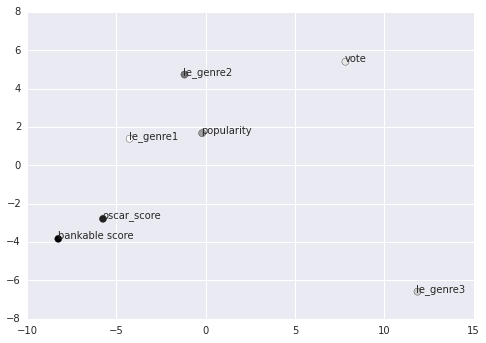

In [164]:
scatter(X_pca[:,0], X_pca[:,1], X_columns)

/Users/galicher/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


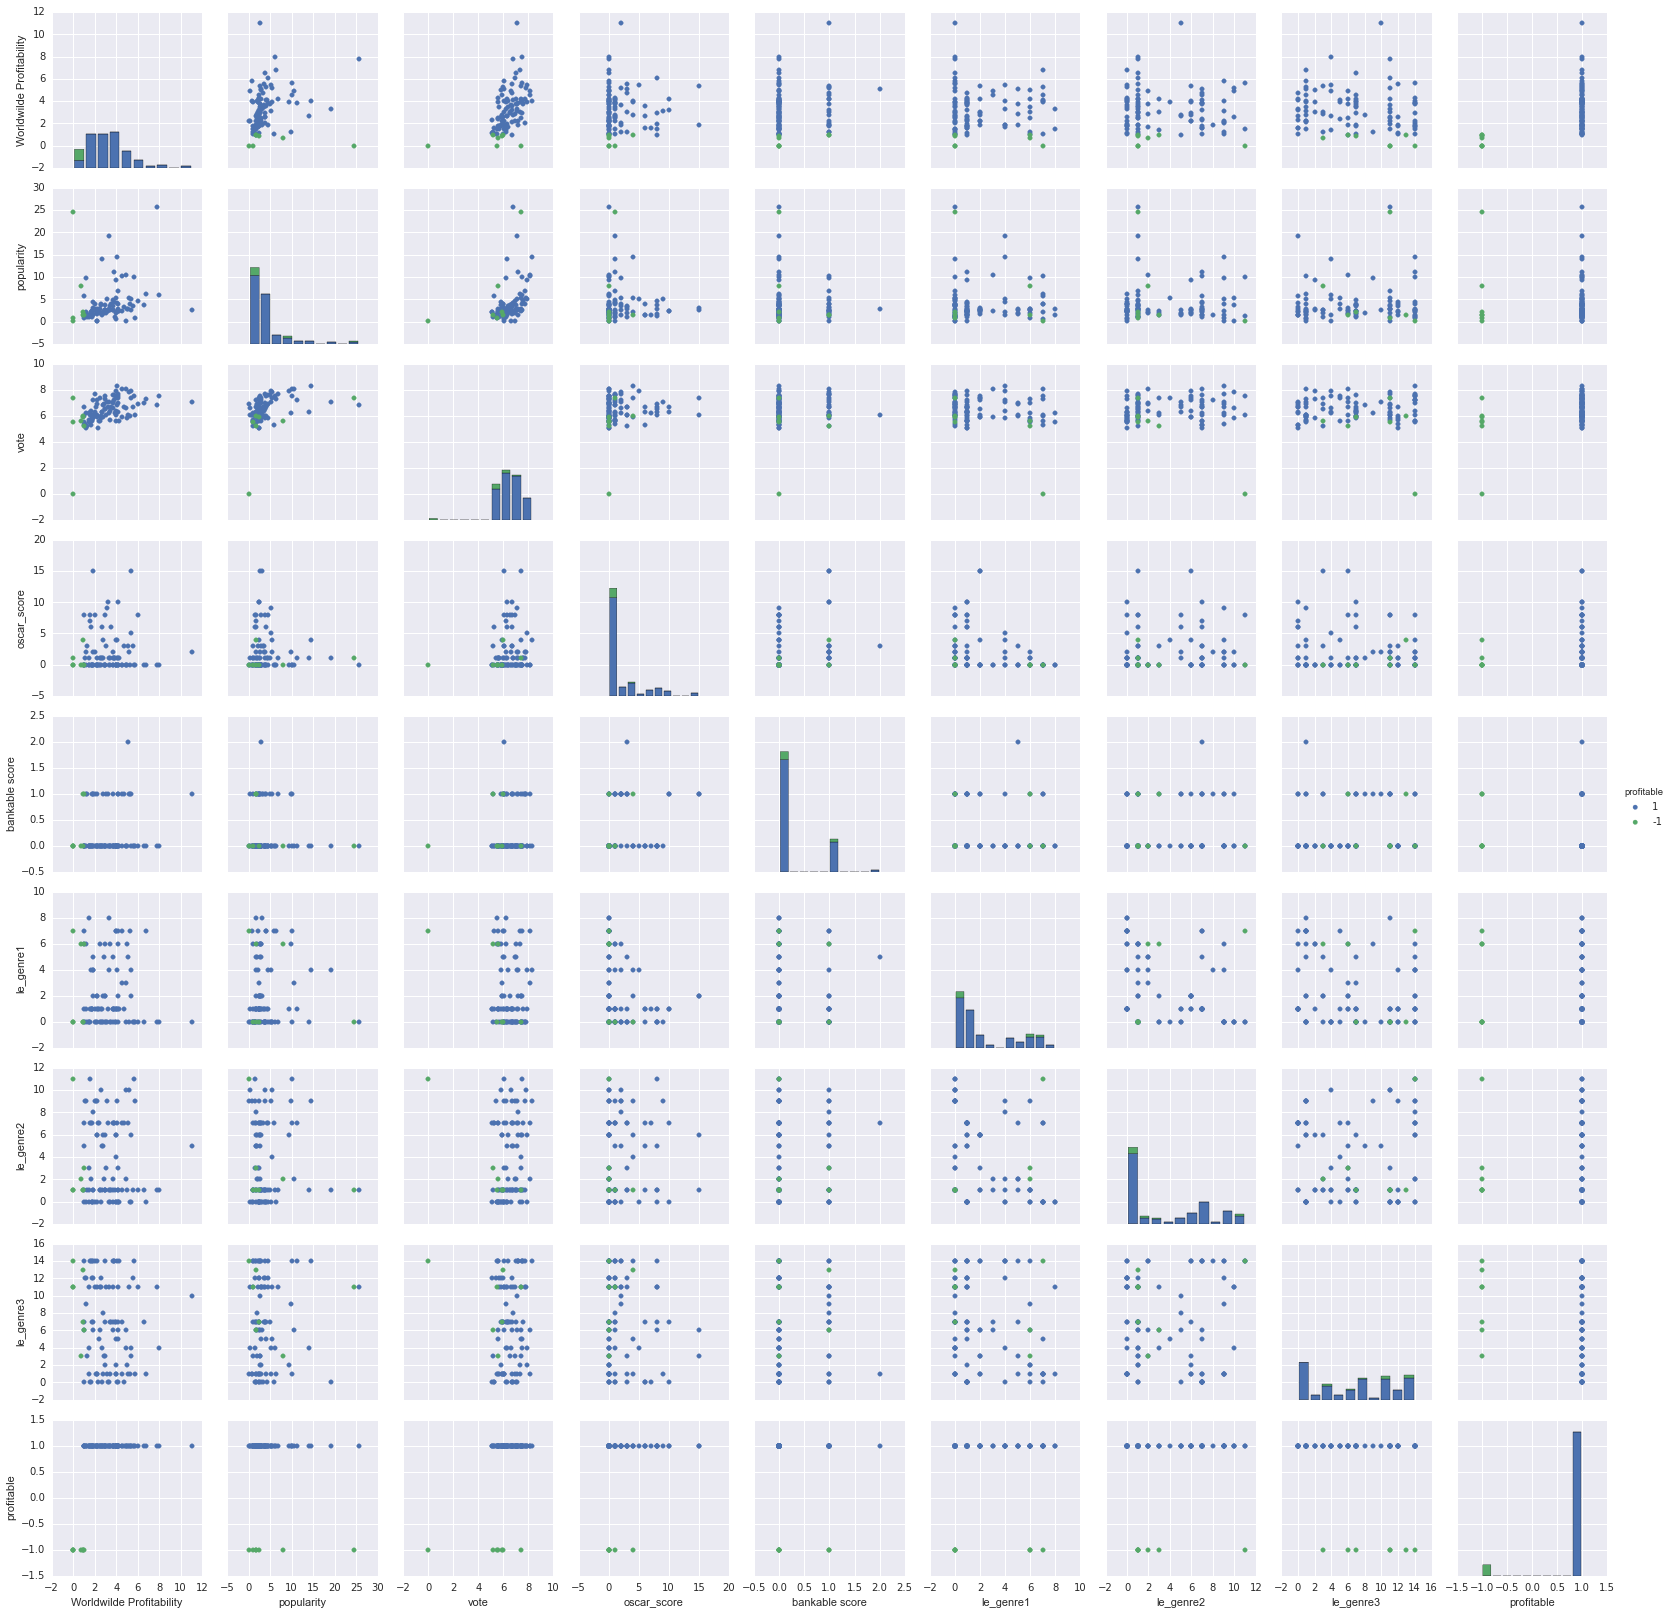

In [162]:
import seaborn as sns
%matplotlib inline
sns.set()
V_columns = ['Worldwilde Profitability','popularity','vote','oscar_score','bankable score','le_genre1','le_genre2','le_genre3']
df_v = df_short[V_columns]
df_v['profitable'] = df_v['Worldwilde Profitability'].apply(lambda x: 1 if x>1 else -1) 
sns.pairplot(df_v, hue='profitable')

In [161]:
df_v

,Worldwilde Profitability,popularity,vote,oscar_score,bankable score,le_genre1,le_genre2,le_genre3,profitable
0,6.550398,3.801272,7.0,0,0,0,1,7,1
1,3.211401,2.442438,6.7,10,1,1,7,0,1
2,2.644150,14.028464,6.3,1,0,0,1,4,1
3,3.943415,5.410009,7.4,4,0,0,4,5,1
4,0.945418,1.562717,6.0,4,1,0,1,13,-1
5,1.028284,1.374379,6.0,0,0,0,1,7,1
6,2.256084,2.897262,7.2,0,0,2,6,14,1
7,3.453005,2.703326,5.7,1,0,6,0,1,1
8,5.618823,10.031664,7.5,0,0,0,11,14,1
9,4.068014,4.132649,6.8,1,0,1,7,0,1


In [165]:
df_short.to_csv('movie_dataset_2.csv')

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


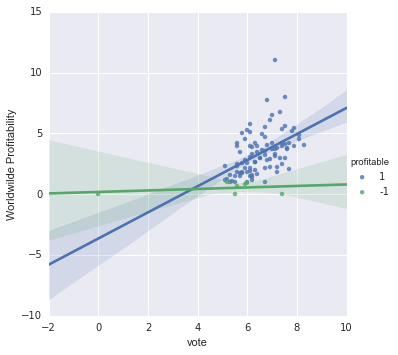

In [169]:
import seaborn as sns; sns.set(color_codes=True)

g = sns.lmplot(x="vote", y="Worldwilde Profitability", hue="profitable", data=df_v)

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


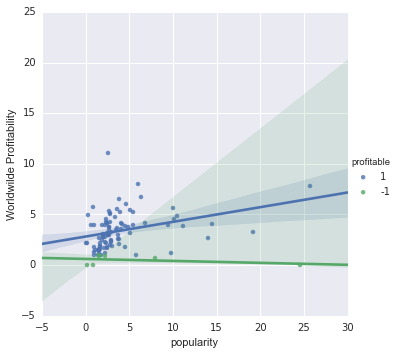

In [170]:
g = sns.lmplot(x="popularity", y="Worldwilde Profitability", hue="profitable", data=df_v)

/Users/galicher/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


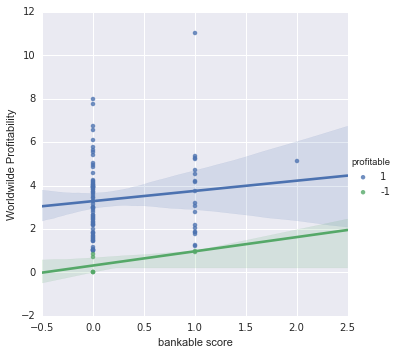

In [172]:
g = sns.lmplot(x="bankable score", y="Worldwilde Profitability", hue="profitable", data=df_v)

/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':
/Users/galicher/anaconda/lib/python3.4/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':
/Users/galicher/anaconda/lib

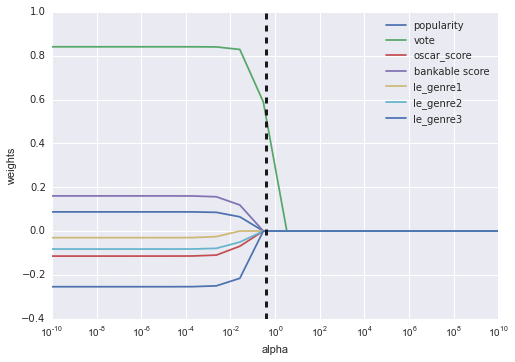

In [175]:
from sklearn import *

def center_reduce(df):
   return (df - df.mean()) / np.std(df)

def center(df):
   return df - df.mean()

def LASSOLARS_plot(y, X, alphas, cv):
   slk_LASSOLARS_cv = linear_model.LassoLarsCV(fit_intercept=False, 
                       normalize=False, cv=cv).fit(X.as_matrix(), y.as_matrix().T)
                       #normalize=False).fit(X, y)
   skl_LASSOLARS = linear_model.LassoLars(fit_intercept=False, normalize=False)
   coefs = []
   for a in alphas:
       skl_LASSOLARS.set_params(alpha=a)
       skl_LASSOLARS.fit(X, y)
       coefs.append([i for i in skl_LASSOLARS.coef_[:]])
   ax = plt.subplot(111)
   plt.plot(alphas, coefs)
   plt.axvline(slk_LASSOLARS_cv.alpha_, color='K', linestyle='--', linewidth=3)
   plt.legend(tuple(X.columns))
   ax.set_xscale('log')
   plt.xlabel('alpha')
   plt.ylabel('weights')

n_alphas = 20
min_log_scale = -10
max_log_scale = 10
alphas = np.logspace(min_log_scale, max_log_scale, n_alphas)
cv = 10
   
path = "movie_dataset_2.csv"
data = pd.read_csv(path)
col = ["Movie",'Worldwilde Profitability','popularity','vote','oscar_score','bankable score','le_genre1',
      'le_genre2','le_genre3']
movies =  data.loc[:,col]
movies = movies.set_index(["Movie"])
movies = movies.dropna().astype(float)
y = movies["Worldwilde Profitability"]
X = movies.drop('Worldwilde Profitability', axis=1)
#X = center(X)
X = center_reduce(X)
LASSOLARS_plot(y, X, alphas, cv)